# Question 1

(a)

P[-|M] = 0.05 (the probability that a randomly chosen person that has the marker will test negative.)

P[+|not M] = 0.95 (the probability that a randomly chosen person that does not have the marker will test positive.)

P[not M] = 0.99 (the portion of the people who do not have the marker.)

(b)

P(M|+) = P(+|M)P(M)/P(+)

P(+) = P(M) * P(+|M) + P(not M) * P(+|not M) = 0.99 * 0.01 + 0.99 * 0.05 = 0.059

P(M|+) = 0.95 * 0.01 / 0.059 = 0.161

--> the probability that a randomly selected person who tests positive for the marker actually has the marker is 0.161 which seems relatively low(high number of false positive results). In general case when the disease is not that serious, the person who tested postiively might not need to be alarmed, but when the disease can cause serious health problem, it will be good to go thorugh further investigations.

(c)

P(M) = 0.10 and P(not M) = 0.90

P(+) = 0.10 * 0. 95 + 0.90 * 0.05 = 0.14

P(M|+) = 0.95 * 0.10 / 0.14 = 0.68

# Question 2

## (a)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class NaiveBayesClassifier():
    def __init__(self):
        self.cls = []
        self.cls_stats = []
        self.prior_prob = []
        self.trained = False
    
    @staticmethod
    def gaussian(X, mean, std):
        """
        Gaussain probability distribution function
        
        Parameters
        ----------
        X: numpy.ndarray
            Input data, shape (n_samples, n_features)
        mean: numpy.ndarray
            Average of each feature, shape (n_features,)
        std: numpy.ndarray
            Standard deviation of each feature, shape (n_features,)
            
        Returns
        -------
        prob: numpy.ndarray
            Probability of each feature, shape (n_samples, n_features)
        """
        norm = 1 / np.sqrt(2 * np.pi * std**2)
        prob = norm * np.exp(-(X - mean)**2 / (2 * std**2))
        return prob
    
    @staticmethod
    def calculate_statistics(X):
        """
        Calculate the average and standard deviation of each feature based on the input data
        
        Parameters
        ----------
        X: numpy.ndarray
            Input data, shape (n_samples, n_features)
            
        Returns
        -------
        mean: numpy.ndarray
            Average of each feature, shape (n_features,)
        std: numpy.ndarray
            Standard deviation of each feature, shape (n_features,)
        """
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        return mean, std
    
    @staticmethod
    def calculate_prob(X, mean, std):
        """
        Calculate the prior probability that the input features belong to a specific class,
        i.e. P(X | C) = \prod_i P(X_i | C)
        which is defined by the statistics of features in that class.
        
        Gaussain probability distribution function
        
        Parameters
        ----------
        X: numpy.ndarray
            Input data, shape (n_samples, n_features)
        mean: numpy.ndarray
            Average of each feature in the speific class, shape (n_features,)
        std: numpy.ndarray
            Standard deviation of each feature in the specific class, shape (n_features,)
            
        Returns
        -------
        prob: numpy.ndarray
            Probability that the features belong to a spcefic class, shape (n_samples,)
        """
        prob = np.product(
            NaiveBayesClassifier.gaussian(X, mean, std),
            axis=1
        )
        return prob
    
    def fit(self, X, y):
        """
        Train the classifier by calculating the statistics of different features in each class
        
        Parameters
        ----------
        X: numpy.ndarray
            Input data, shape (n_samples, n_features)
        y: numpy.ndarray
            Labels (the actual classes), shape (n_samples)
        """
        ndata = y.shape[0]
        self.cls = np.unique(y)
        for i in range(len(self.cls)):
            cls_filter = (y == self.cls[i])
            self.prior_prob.append(np.sum(cls_filter) / ndata)
            self.cls_stats.append(NaiveBayesClassifier.calculate_statistics(X[cls_filter]))
        self.trained = True
            
    def predict(self, X):
        # Do the prediction by outputing the class that has highest probability
        assert self.trained, f"The classfier has not been trained. Call {self.__class__.__name__}.fit first"
        probs = [
            self.calculate_prob(X, *self.cls_stats[i]) * self.prior_prob[i] for i in range(len(self.cls))
        ]
        return self.cls[np.argmax(probs, axis=0)]

In [6]:
df = pd.read_csv('/Users/mac_1/Desktop/CHEM C142/wines.csv')
df

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1
2,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1,1
3,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280,1,1
4,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630,3,3
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3,3
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3,3
176,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,3,3


In [31]:
df_1 = df[df['ranking'] ==1]

print('cultivar 1 alc mean: ', df_1.mean()['Alcohol %'])
print('cultivar 1 alc std: ', df_1.std()['Alcohol %'])

NaiveBayesClassifier.gaussian(13, df_1.mean()['Alcohol %'], df_1.std()['Alcohol %'])

cultivar 1 alc mean:  13.744745762711865
cultivar 1 alc std:  0.46212535966129437


0.23560636969337126

## (b)

In [35]:
df_features = df.drop(['ranking', 'Start assignment'], axis=1)
df_features

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
2,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
3,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
4,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
176,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_features)

df_trained = scaler.transform(df_features)
df_trained

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.29570023,  0.22769377,  1.84040254, ...,  0.36217728,
         0.44960118, -0.03787401],
       [ 2.25977152, -0.62508622, -0.7183361 , ...,  0.53767082,
         0.33660575,  0.94931905],
       ...,
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041],
       [-0.92721209, -0.54429654, -0.90110314, ...,  0.18668373,
         0.78858745, -0.7543851 ]])

Preprocess data:
+ Select relevant descriptors (columns other than "Start assignment" and "ranking"). Should get *178 datapoints and 13 features*.
+ Normalize the data with `StandardScaler` in sklearn.
+ The labels are in the "ranking" column.

*For debugging*: The accuracy could reach over 95\%.

In [45]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
import numpy as np

def calculate_accuracy(model, X, y):
    y_pred = model.predict(X)
    acc = np.sum(y_pred == y) / len(y)
    return acc

def KFoldNaiveBayes(k, X, y):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    train_acc_all = []
    test_acc_all = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = GaussianNB()  # Instantiate a Naive Bayes model
        model.fit(X_train, y_train)  # Train the model
        
        # Calculate accuracy
        train_acc = calculate_accuracy(model, X_train, y_train)
        train_acc_all.append(train_acc)
        
        test_acc = calculate_accuracy(model, X_test, y_test)
        test_acc_all.append(test_acc)
        
        print("Train accuracy:", train_acc)
        print("Test accuracy:", test_acc)
    
    # Print final results
    print("Final results:")
    print("Training accuracy: Mean = {}, Std = {}".format(np.mean(train_acc_all), np.std(train_acc_all)))
    print("Testing  accuracy: Mean = {}, Std = {}".format(np.mean(test_acc_all), np.std(test_acc_all)))

# Example usage (assuming X and y are defined):
# KFoldNaiveBayes(5, X, y)

In [49]:
KFoldNaiveBayes(3, df_trained, df['ranking'])

Train accuracy: 0.9830508474576272
Test accuracy: 0.95
Train accuracy: 0.9915966386554622
Test accuracy: 0.9830508474576272
Train accuracy: 0.9747899159663865
Test accuracy: 0.9830508474576272
Final results:
Training accuracy: Mean = 0.9831458006931587, Std = 0.006861644310929961
Testing  accuracy: Mean = 0.9720338983050848, Std = 0.015580318907500243


# Question 3

## (a)

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

In [72]:
# Define your model here

X = df_features
y = df['ranking'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X_scaled)
y_tensor = torch.LongTensor(y)

class WineClassifier(nn.Module):
    def __init__(self, num_features, num_classes, use_softmax=False):
        super(WineClassifier, self).__init__()
        self.use_softmax = use_softmax
        self.linear = nn.Linear(num_features, num_classes)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.linear(x)
        if self.use_softmax:
            x = self.softmax(x)
        return x

# Initialize the model without softmax
model_without_softmax = WineClassifier(num_features=X.shape[1], num_classes=len(wine.target_names), use_softmax=False)

# Initialize the model with softmax
model_with_softmax = WineClassifier(num_features=X.shape[1], num_classes=len(wine.target_names), use_softmax=True)

# Pass data through the models
output_without_softmax = model_without_softmax(X_tensor)
output_with_softmax = model_with_softmax(X_tensor)

# Print the outputs
print("Output without softmax:\n", output_without_softmax)
print("\nOutput with softmax:\n", output_with_softmax)

print("softmax function converts the raw logits into a probability distribution over the classes for each data point, making the model's predictions interpretable in terms of probabilities.")

Output without softmax:
 tensor([[ 5.8320e-02,  1.9184e-01,  3.7368e-01],
        [-4.1569e-01, -6.1348e-01, -7.1868e-02],
        [ 2.2782e-01,  4.4237e-01,  7.7736e-01],
        [ 3.6725e-01,  4.2811e-01,  4.8333e-01],
        [ 3.1908e-01,  4.4614e-01,  5.0787e-01],
        [-5.7267e-02, -4.9702e-02,  4.7739e-01],
        [-2.0999e-01, -8.2391e-03,  3.4204e-01],
        [ 1.8427e-01,  1.1504e-01,  1.4246e-01],
        [ 2.4207e-01, -3.2857e-01,  1.2790e-01],
        [ 3.0828e-01,  6.2778e-01,  5.0478e-01],
        [ 3.5870e-01,  4.3739e-01,  5.5915e-01],
        [-3.5898e-01, -4.8975e-01,  1.0306e-01],
        [-3.5747e-01, -6.6927e-02,  1.0790e-01],
        [-6.6092e-02,  2.0169e-01,  2.1980e-01],
        [ 1.9899e-01,  4.0758e-01,  8.4362e-01],
        [-6.1806e-02,  3.0826e-01,  3.6532e-01],
        [ 4.5241e-02,  1.0516e-01,  4.2144e-01],
        [ 3.6671e-01,  2.7380e-01,  3.1749e-01],
        [-1.7844e-01,  3.0323e-01,  8.4503e-01],
        [-2.5609e-02,  5.8530e-01,  9.0562e-

## (b)

*For debugging*: The accuracy could reach over 95\% if the hyperparamters are tuned properly.

In [78]:
def train_and_val(model, X_train, y_train, epochs, draw_curve=True):
    """
    Further split the data into acutal train and validation subsets.
    """
    # Define your loss function, optimizer
    loss_func = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr = 0.001)
    
    X_train_in, X_val, y_train_in, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    val_losses = []
    lowest_val_loss = np.inf
    
    weights = {}
    for i in range(epochs):
        # Compute the loss and do back-propagation
        y_train_pred = model(X_train_in)
        loss = loss_func(y_train_pred, y_train_in)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Compute validation loss and keep track of the lowest val loss
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = loss_func(y_val_pred, y_val).item()
        
        if val_loss < lowest_val_loss:
            lowest_val_loss = val_loss
            weights = model.state_dict() 
        val_losses.append(val_loss)
        
    # The final number of epochs is when the minimum error in validation set occurs    
    final_epochs = np.argmin(val_losses)
    print("Number of epochs with lowest validation:", final_epochs)
    print(f"Validation loss: {np.min(val_losses)}")
    # Recover the model weights
    model.load_state_dict(weights)

    if draw_curve:
        fig, ax = plt.subplots(1, 1, figsize=(5, 4), constrained_layout=True)
        ax.plot(np.arange(epochs), val_losses, label='Validation loss')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss')
        ax.legend()
    
    return model


def calculate_accuracy_nn(model, X, y):
    with torch.no_grad():
        y_pred = torch.argmax(model(X), axis=1)
        acc = torch.sum(y_pred == y) / len(y)
    return acc.detach().numpy()


def KFoldNN(k, X, y, epochs=500):
    """
    K-Fold Validation for Neural Network
    
    Parameters
    ---------
    k: int
        Number of folds
    X: numpy.ndarray
        Input data, shape (n_samples, n_features)
    y: numpy.ndarray
        Class labels, shape (n_samples)
    epochs: int
        Number of epochs during training
    """
    # K-Fold
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    train_acc_all = []
    test_acc_all = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # further do a train/valid split on X_train
        model = WineClassifier(num_features=X.shape[1], num_classes=len(np.unique(y)))
        trained_model = train_and_val(model, torch.FloatTensor(X_train), torch.LongTensor(y_train), epochs)
        
        # Report prediction accuracy for this fold
        # use calculate_accuracy_nn() function
        train_acc = calculate_accuracy_nn(trained_model, torch.FloatTensor(X_train), torch.LongTensor(y_train))
        train_acc_all.append(train_acc)
        test_acc = calculate_accuracy_nn(trained_model, torch.FloatTensor(X_test), torch.LongTensor(y_test))
        test_acc_all.append(test_acc)
        print("Train accuracy:", train_acc)
        print("Test accuracy:", test_acc)
    
    # report mean & std for the training/testing accuracy
    print("Final results:")
    print("Training accuracy: Mean = {}, Std = {}".format(np.mean(train_acc_all), np.std(train_acc_all)))
    print("Testing  accuracy: Mean = {}, Std = {}".format(np.mean(test_acc_all), np.std(test_acc_all)))

Test Accuracy: 0.8611111044883728
Number of epochs with lowest validation: 499
Validation loss: 0.22123511135578156
Train accuracy: 0.9745763
Test accuracy: 0.98333335
Number of epochs with lowest validation: 499
Validation loss: 0.21994464099407196
Train accuracy: 1.0
Test accuracy: 0.9322034
Number of epochs with lowest validation: 499
Validation loss: 0.23029588162899017
Train accuracy: 0.9747899
Test accuracy: 0.9491525
Final results:
Training accuracy: Mean = 0.9831220507621765, Std = 0.011934817768633366
Testing  accuracy: Mean = 0.9548964500427246, Std = 0.0212651826441288


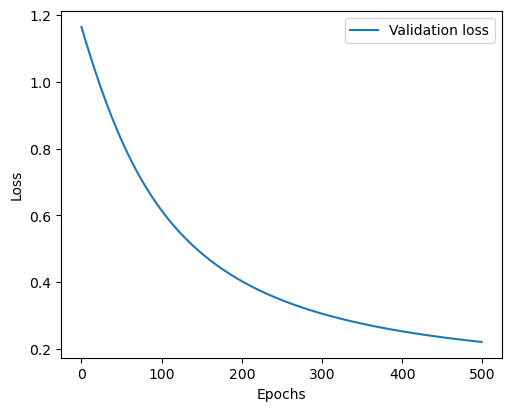

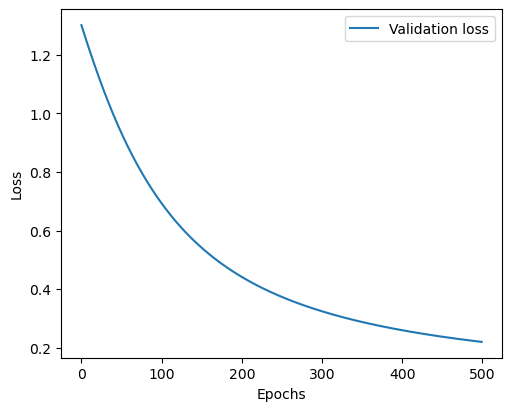

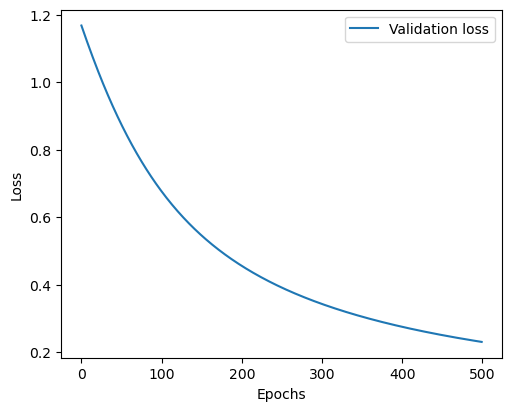

In [97]:
'''wine = load_wine()
X = wine.data
y = wine.target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

num_features = X.shape[1]
num_classes = len(np.unique(y))

model = WineClassifier(num_features=num_features, num_classes=num_classes)
trained_model = train_and_val(model, X_train_tensor, y_train_tensor, epochs=100)

test_accuracy = calculate_accuracy_nn(trained_model, X_test_tensor, y_test_tensor)'''
print(f"Test Accuracy: {test_accuracy}")


KFoldNN(k=3, X=X_scaled, y=y, epochs=500)



Based on the results, predictions of problem 2 and 3 shows similar accuracy.